# Dataset Exploration of Kaggle ECG Heartbeat Dataset

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 📖 TABLE OF CONTENTS

- [1. Intro]()
- [2. Dataset Overview]()
  - [🔗 Dataset Link]()
  - [📥 Download and Load the Dataset]()
  - [📝 Dataset Structure]()
  - [📋 Summary of Classes]()
- [3. Initial Data Inspection]()
  - [✅ Check Dataset Size]()
  - [✅ Check for Missing Values]()
  - [✅ Class Distribution in Training and Testing Sets]()
  - [📝 Observations]()
- [4. Visualizing ECG Signals]()
  - [🔍 Plot Example Heartbeats for Each Class]()
  - [📝 Observations]()
- [5. Visualizing ECG Signals]()
  - [🔗 Dataset Link]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Intro

Welcome to the second Jupyter Notebook of the **HeartBeatInsight** Project! In this Notebook, we will perform a **detailed exploration** of the [Kaggle ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat). Our goal is to understand the dataset **inside out** through various data exploration techniques. By the end of this section, you'll know every detail of this dataset — its structure, distribution, features, and potential challenges.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Dataset Overview

Let's begin by loading and examining the dataset.

## 🔗 Dataset Link

[**Kaggle ECG Heartbeat Dataset**](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

## 📥 Download and Load the Dataset

First, download the dataset from Kaggle.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print(f"Path to dataset files: {path}")

100%|██████████| 98.8M/98.8M [00:04<00:00, 22.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


Now, move the downloaded dataset to /content folder.

In [2]:
import os
import shutil

# Define the source and destination paths
source_path = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1"
destination_path = "/content"

# Ensure the destination directory exists
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# List all files and directories in the source path
for item in os.listdir(source_path):
    # Construct full file paths
    source_item = os.path.join(source_path, item)
    destination_item = os.path.join(destination_path, item)

    # Move the file or directory
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.move(source_item, destination_item)

print("Files and directories have been moved to /content.")
print(f"Content of /content: \n{os.listdir('/content')}")

Files and directories have been moved to /content.
Content of /content: 
['.config', 'ptbdb_normal.csv', 'mitbih_train.csv', 'ptbdb_abnormal.csv', 'mitbih_test.csv', 'sample_data']


Now, import the necessary libraries and load the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from collections import Counter

# Load the training and testing datasets
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

# Display the first few rows of the training dataset
train_df.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 📝 Dataset Structure

- **Rows:** Each row represents an individual heartbeat segment.

- **Columns:**

    - The first **187 columns** are the time-series values of the ECG signal.
    
    - The **188th column** is the label (heartbeat class).

## 📋 Summary of Classes

| Class Label | Class Description | Code |
| :---------- | :---------------- | :--- |
| **0** | Normal Beat | **N** |
| **1** | Supraventricular Ectopic Beat | **S** |
| **2** | Ventricular Ectopic Beat | **V** |
| **3** | Fusion Beat | **F** |
| **4** | Unknown Beat | **Q** |

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Initial Data Inspection

## ✅ Check Dataset Size

In [4]:
print(f"Training Set Shape: {train_df.shape}")
print(f"Testing Set Shape: {test_df.shape}")

Training Set Shape: (87553, 188)
Testing Set Shape: (21891, 188)


## ✅ Check for Missing Values

In [5]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


**Interpretation:** If the result is **0**, the dataset has no missing values.

## ✅ Class Distribution in Training and Testing Sets

In [6]:
train_labels = train_df.iloc[:, -1]
test_labels = test_df.iloc[:, -1]

# Count the occurrences of each class
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

print(f"Training Set Class Distribution: {train_class_counts}")
print(f"Testing Set Class Distribution: {test_class_counts}")

Training Set Class Distribution: Counter({0.0: 72470, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})
Testing Set Class Distribution: Counter({0.0: 18117, 4.0: 1608, 2.0: 1448, 1.0: 556, 3.0: 162})


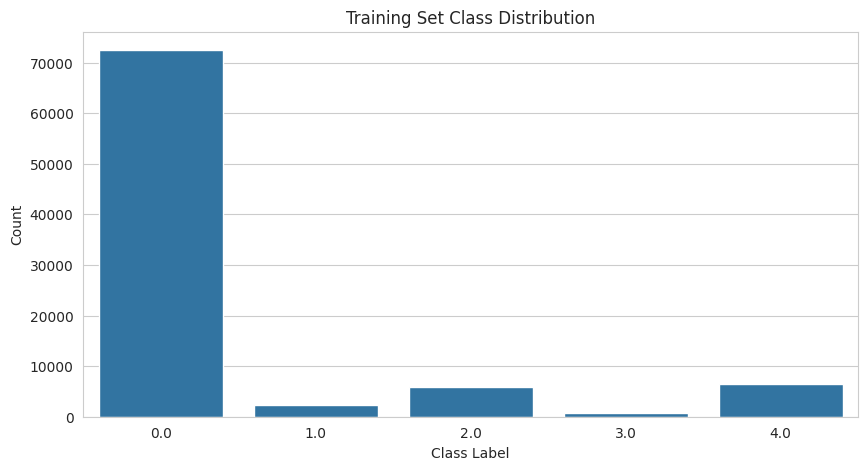

In [7]:
# Plot the Training Set Class Distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels)
plt.title("Training Set Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

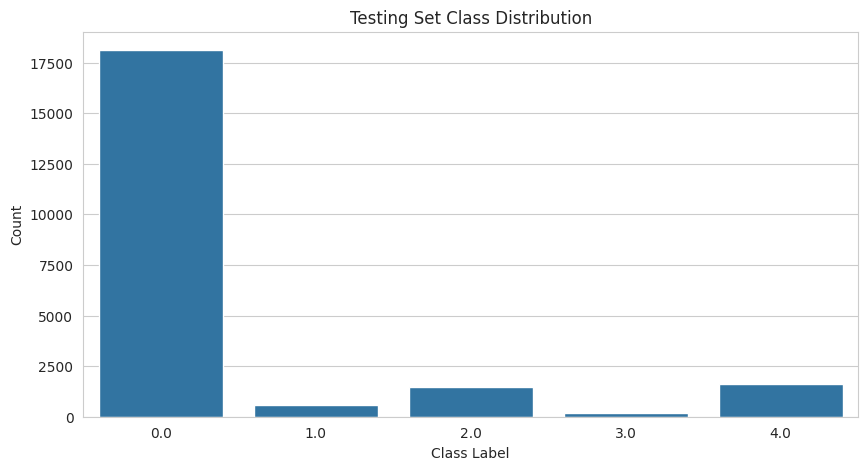

In [8]:
# Plot the Testing Set Class Distribution
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(x=test_labels)
plt.title("Testing Set Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

## 📝 Observations

- Notice the **imbalance** in class distribution. Some classes have far fewer samples than others.

- This imbalance may affect model performance, requiring techniques like **resampling** or **class weighting**.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Visualizing ECG Signals

Let’s visualize some ECG signals from each class to understand their characteristics.

## 🔍 Plot Example Heartbeats for Each Class

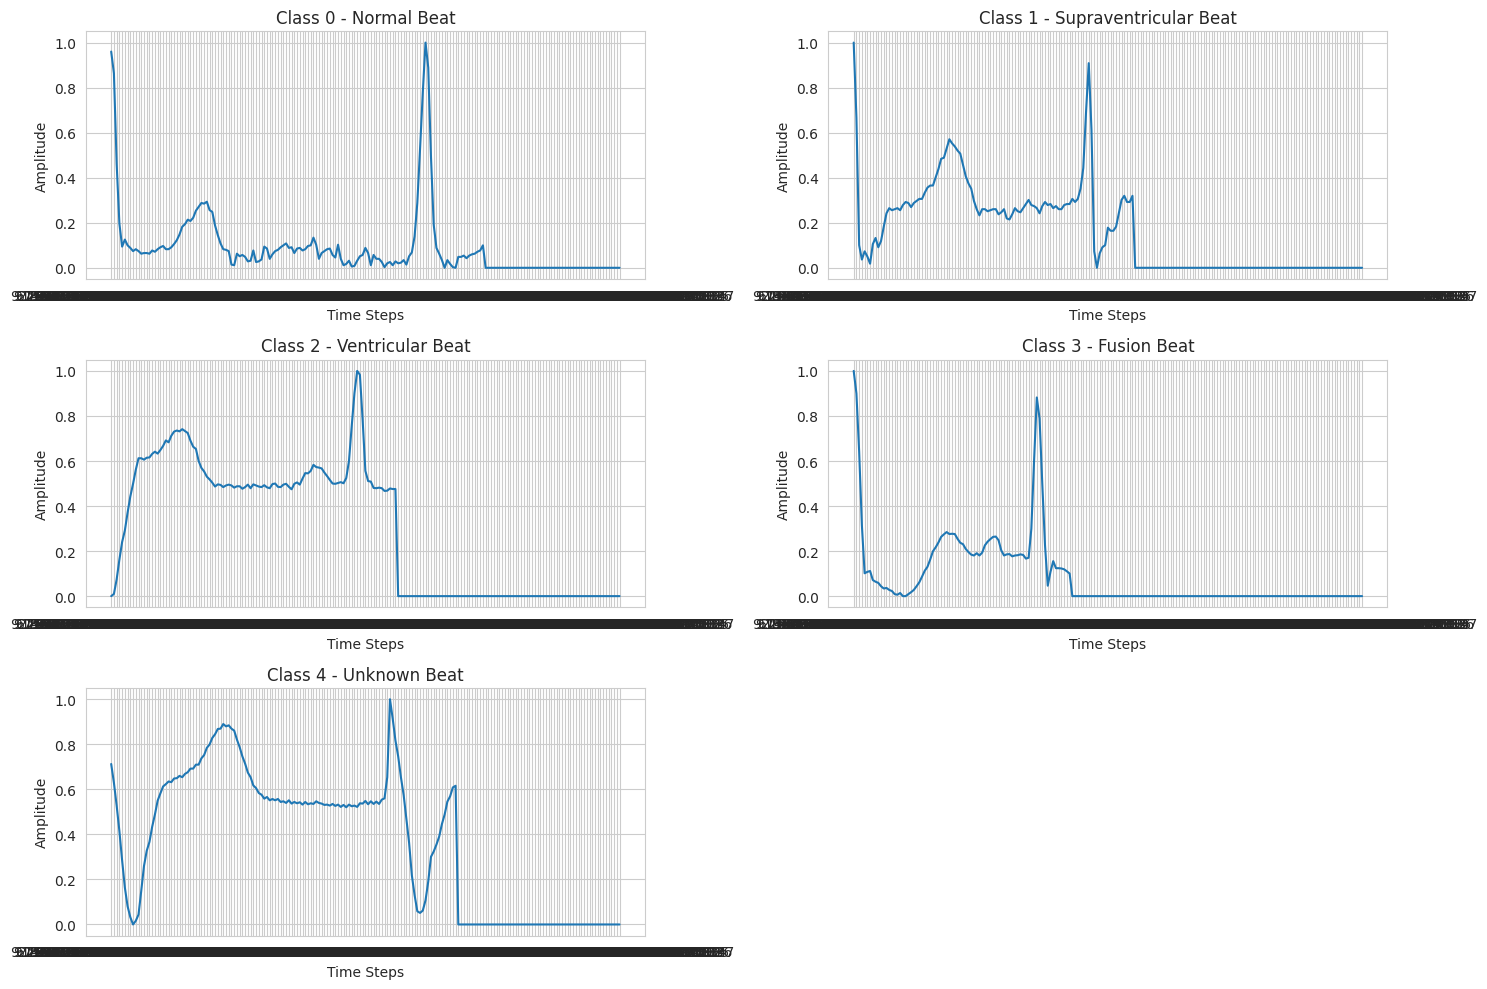

In [10]:
plt.figure(figsize=(15, 10))

# Plot one example from each class
for label in range(5):
    plt.subplot(3, 2, label + 1)
    sample = train_df[train_df.iloc[:, -1] == label].iloc[0, :-1]
    plt.plot(sample)
    plt.title(f"Class {label} - {['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown'][label]} Beat")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

## 📝 Observations

- **Normal Beats (Class 0)** typically have a regular, consistent pattern.

- **Supraventricular Ectopic Beats (Class 1)** may show variations in the P-wave.

- **Ventricular Ectopic Beats (Class 2)** often have a wider QRS complex.

- **Fusion Beats (Class 3)** show a mix of normal and abnormal features.

- **Unknown Beats (Class 4)** exhibit irregular patterns.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Statistical Analysis of Features

## ✅ Descriptive Statistics

Get basic statistics (mean, standard deviation, etc.) for the signal values.

In [11]:
train_stats = train_df.describe()
print(train_stats)

       9.779411554336547852e-01  9.264705777168273926e-01  \
count              87553.000000              87553.000000   
mean                   0.890359                  0.758158   
std                    0.240910                  0.221814   
min                    0.000000                  0.000000   
25%                    0.921922                  0.682482   
50%                    0.991342                  0.826007   
75%                    1.000000                  0.910506   
max                    1.000000                  1.000000   

       6.813725233078002930e-01  2.450980395078659058e-01  \
count              87553.000000              87553.000000   
mean                   0.423969                  0.219104   
std                    0.227305                  0.206880   
min                    0.000000                  0.000000   
25%                    0.250965                  0.048458   
50%                    0.429467                  0.165992   
75%                    

## ✅ Signal Value Distribution

Visualize the distribution of ECG signal values.

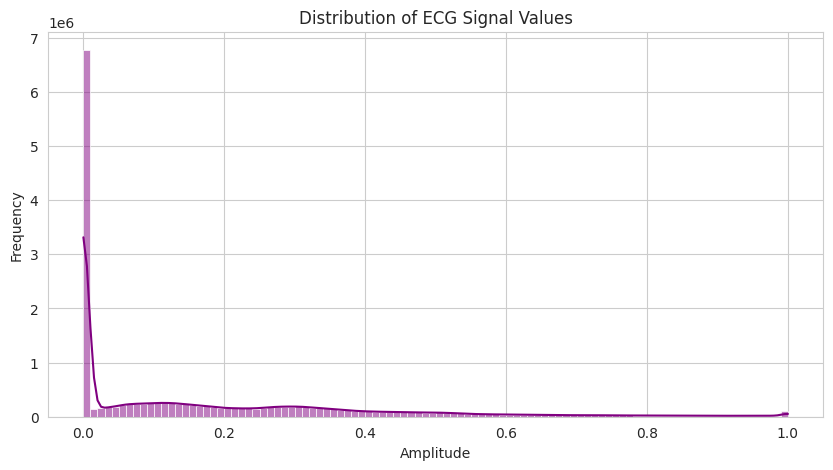

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df.iloc[:, :-1].values.flatten(), bins=100, kde=True, color='purple')
plt.title("Distribution of ECG Signal Values")
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.show()

## ✅ Box Plot for Signal Values

### 📈 Strategy 1: Plot Time Steps in Batches

This approach divides the time steps into smaller, more manageable batches and creates separate box plots for each batch.

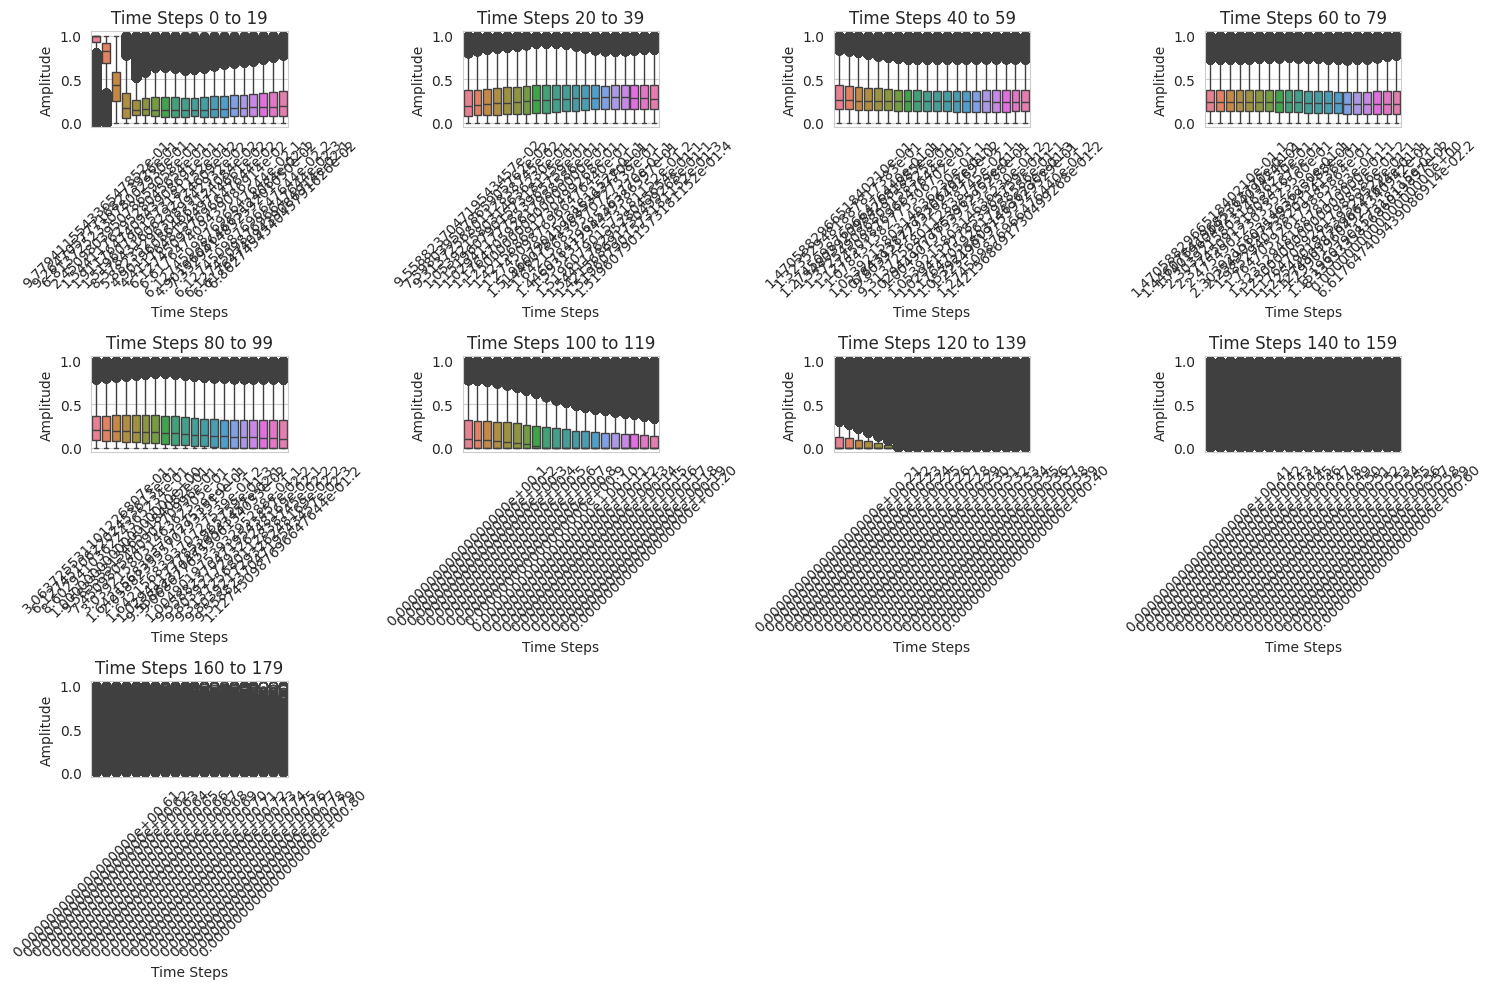

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of time steps per batch
batch_size = 20

# Calculate the number of batches
num_batches = train_df.shape[1] // batch_size

# Plot box plots for each batch of time steps
plt.figure(figsize=(15, 10))
for i in range(num_batches):
    start_col = i * batch_size
    end_col = (i + 1) * batch_size
    plt.subplot(3, 4, i + 1)  # Create a grid of subplots (3 rows, 4 columns)
    sns.boxplot(data=train_df.iloc[:, start_col:end_col])
    plt.title(f"Time Steps {start_col} to {end_col - 1}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

**Explanation:**

- **Batch Size:** Each batch contains 20 time steps.
    
- **Subplots:** We create a grid of subplots (3 rows and 4 columns) to display multiple batches.
    
- **Rotation:** x-axis labels are rotated by 45 degrees for better readability.
    
- **Tight Layout:** Ensures subplots do not overlap.

### 📈 Strategy 2: Plot a Subsample of Time Steps

Instead of plotting all 187 time steps, let's plot every **10th time step** to reduce clutter.

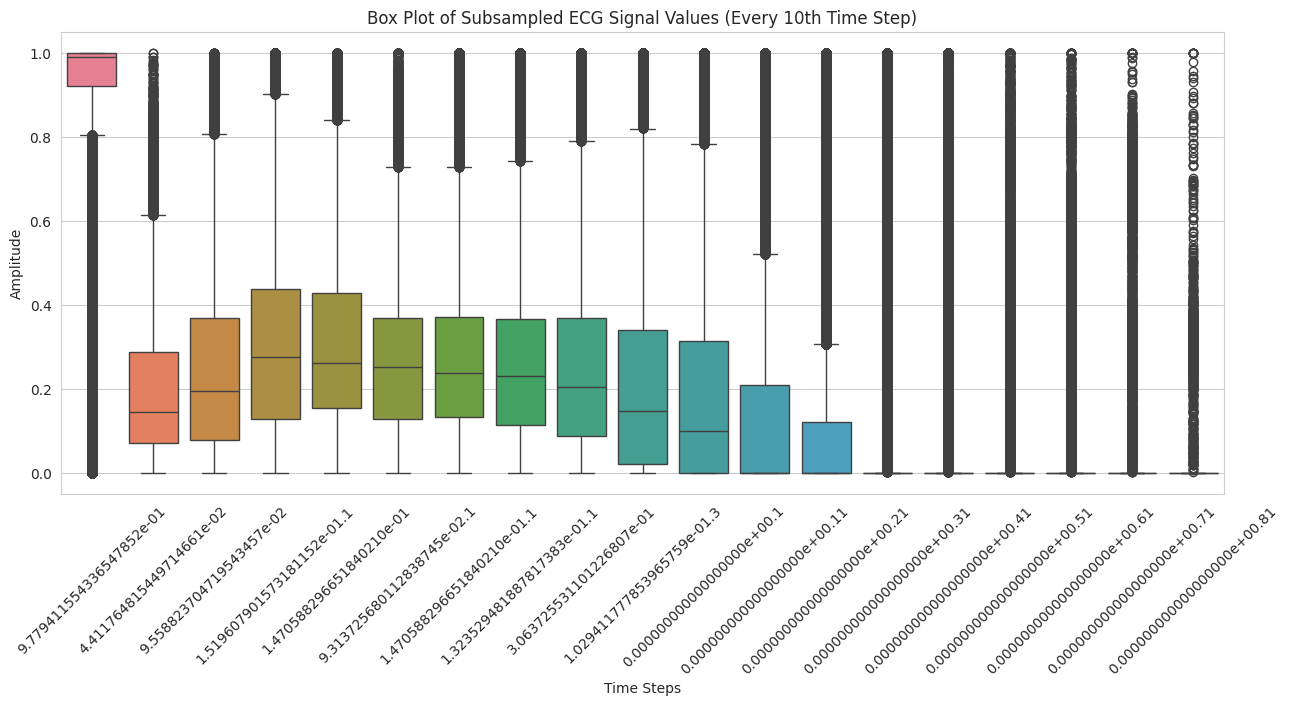

In [21]:
plt.figure(figsize=(15, 6))

# Select every 10th time step
selected_columns = train_df.columns[::10]

sns.boxplot(data=train_df[selected_columns])
plt.title("Box Plot of Subsampled ECG Signal Values (Every 10th Time Step)")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

**Explanation:**

- **Subsampling:** We select every 10th column (::10) from the dataset.
    
- **Box Plot:** Plots the subsampled columns to reduce clutter.
    
- **Rotation:** x-axis labels are rotated by 45 degrees for better readability.

### 🎨 Comparison of Both Strategies

- **Strategy 1 (Batches):** Provides a detailed look at all the time steps by dividing them into smaller chunks. Suitable when you want to explore all time steps.

- **Strategy 2 (Subsampling):** Offers a quick overview of the data by reducing the number of time steps plotted. Useful for a high-level summary.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Detecting Imbalances and Outliers

## ✅ Class Imbalance Visualization

<ipython-input-14-67cf872c2031>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_labels, palette='viridis')


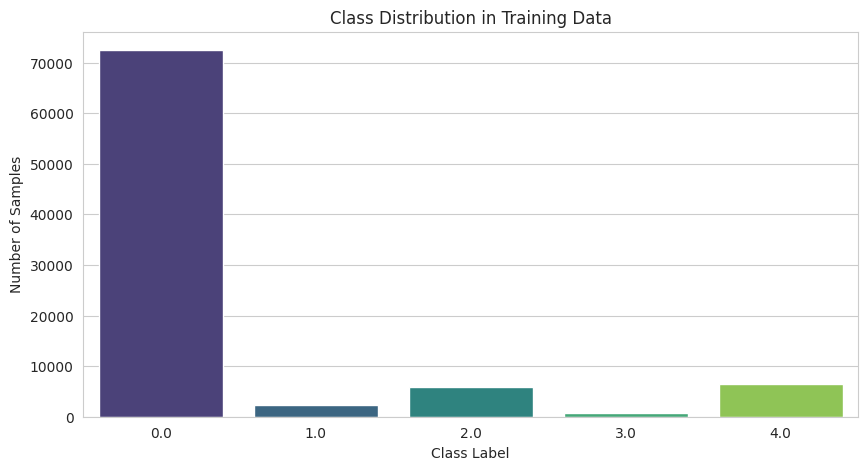

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels, palette='viridis')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

## ✅ Outlier Detection Using Z-Score

Calculate the **Z-scores** to detect outliers in the ECG signals.

In [15]:
z_scores = zscore(train_df.iloc[:, :-1], axis=1)
outlier_indices = np.where(np.abs(z_scores) > 3)[0]
print(f"Number of Outliers Detected: {len(outlier_indices)}")

Number of Outliers Detected: 334838


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Advanced Visualizations

## ✅ Animated Visualization of Heartbeats

Create an animated plot of a heartbeat signal.

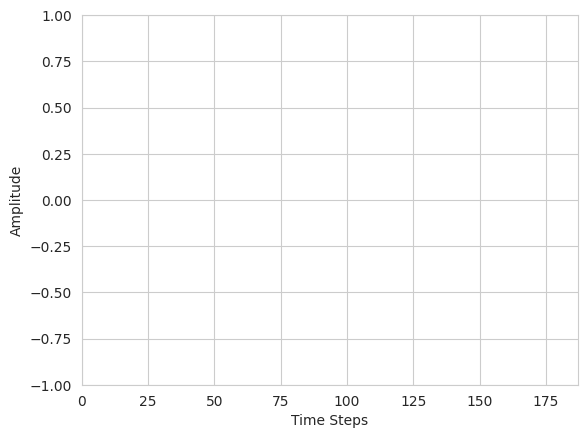

In [18]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 187)
ax.set_ylim(-1, 1)
ax.set_xlabel("Time Steps")
ax.set_ylabel("Amplitude")

def init():
    line.set_data([], [])
    return line,

def update(frame):
    y = train_df.iloc[frame, :-1]
    line.set_data(range(187), y)
    return line,

ani = animation.FuncAnimation(fig, update, frames=range(0, 100), init_func=init, blit=True)
plt.show()

## ✅ Correlation Heatmap

Show how different time steps correlate with each other.

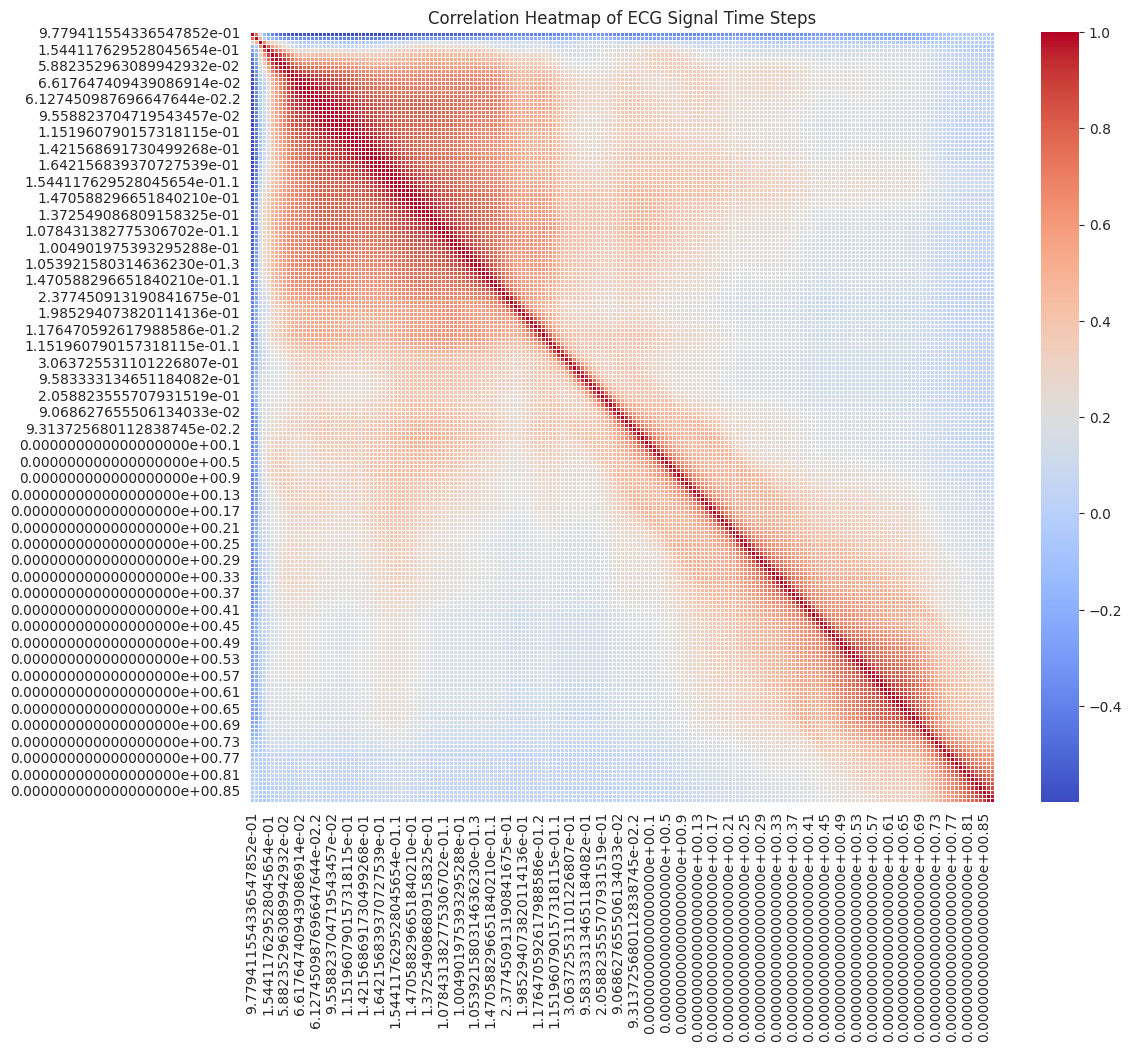

In [19]:
plt.figure(figsize=(12, 10))
corr = train_df.iloc[:, :-1].corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of ECG Signal Time Steps")
plt.show()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 8. Summary of Dataset Insights

## 📝 Key Findings

1. **No Missing Values:** The dataset is clean and ready for analysis.

2. **Class Imbalance:** Some classes (e.g., Normal Beats) have significantly more samples than others (e.g., Fusion Beats).

3. **Distinct ECG Patterns:** Each class has unique characteristics (e.g., QRS width).

4. **Signal Range:** The amplitude of ECG signals varies between approximately **-1 and 1**.

5. **Outliers:** Some potential outliers may need handling.

## 🧩 Next Steps

1. **Data Preprocessing:** Normalize data, handle class imbalance, and remove outliers.

2. **Model Building:** Develop Deep Learning models (CNN, LSTM, and hybrid models) for heartbeat classification.

3. **Evaluation and Comparison:** Use appropriate metrics to evaluate and compare model performance.

4. **Deployment:** Deploy the best model for real-world use cases.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)